<a href="https://colab.research.google.com/github/indianaeronaut/recursive__binary__search/blob/main/01KK_Project_AppliedStatistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project: Applied Statistics
# By: Krishna Kant Kaushal
# Python version used: Python 3.7.3

# Tasks:
1. Import the necessary libraries [done]

2. Read the data as a data frame [done]

3. Perform basic EDA which should include the following and print out your insights at every step.

3a. Shape of the data [done]

3b. Data type of each attribute [done]

3c. Checking the presence of missing values [done]

3d. 5 point summary of numerical attributes [done]

3e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.[done]

3f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns[done]

3g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns[done]

3h. Distribution of categorical columns (include children)[done]

3i. Pair plot that includes all the columns of the dataframe[done]

4. Answer the following questions with statistical evidence

4a. Do charges of people who smoke differ significantly from the people who don't?[done]

4b. Does bmi of males differ significantly from that of females?[done]

4c. Is the proportion of smokers significantly different in different genders?[done]

4d. Is the distribution of bmi across women with no children, one child and two children, the same ?[done]


# Task 1 (Import the necessary libraries) below:

In [ ]:
# for importing data and data analysis
import pandas as pd

# for arrays and matrices
import numpy as np

# for visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_palette("BrBG", 6, desat = None)

# for one sample and two sample tests
from statsmodels.stats.power import ttest_power
from statsmodels.stats.proportion import proportions_ztest

# for t test
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind

# for test of proportion and ANOVA
import statsmodels.api as sm
from   statsmodels.formula.api import ols


# Task 2 (Read the data as a data frame) below

In [ ]:
dataset = pd.read_csv('insurance.csv')
dataset.head(15)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


# Task 3a (Shape of the data) below

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [ ]:
print('There are %s rows and %s columns in the dataset.' %(dataset.shape[0], dataset.shape[1]))

print('\nBelow are the dataset attributes:')
for i, item in enumerate(dataset.columns,1):
    print(i, '. ' + item, sep='',end='\n')

There are 1338 rows and 7 columns in the dataset.

Below are the dataset attributes:
1. age
2. sex
3. bmi
4. children
5. smoker
6. region
7. charges


Insight: The dataset has 7 attributes and there are 1338 observations.

# Task 3b. (Data type of each attribute) below:

In [ ]:
for i in dataset.columns :
    print('Data type of', i , 'is' , dataset[i].dtype)

Data type of age is int64
Data type of sex is object
Data type of bmi is float64
Data type of children is int64
Data type of smoker is object
Data type of region is object
Data type of charges is float64


# Task 3c (Checking the presence of missing values) below:

In [ ]:
print('Number of Missing Values by Attributes:\n')
print(dataset.isnull().sum().sort_values())

Number of Missing Values by Attributes:

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


Insight: No missing values.

# Task 3d (5 point summary of numerical attributes) below:

In [ ]:
ds_summary = dataset.describe(include='all')
ds_summary

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [ ]:
print('\nFive Point Summary: \n\n' , ds_summary.iloc[6:  , [0, 2, 3, 6]])


Five Point Summary: 

       age       bmi  children       charges
min  18.0  15.96000       0.0   1121.873900
25%  27.0  26.29625       0.0   4740.287150
50%  39.0  30.40000       1.0   9382.033000
75%  51.0  34.69375       2.0  16639.912515
max  64.0  53.13000       5.0  63770.428010


# Task 3e (Distribution of ‘bmi’, ‘age’ and ‘charges’ columns) below:

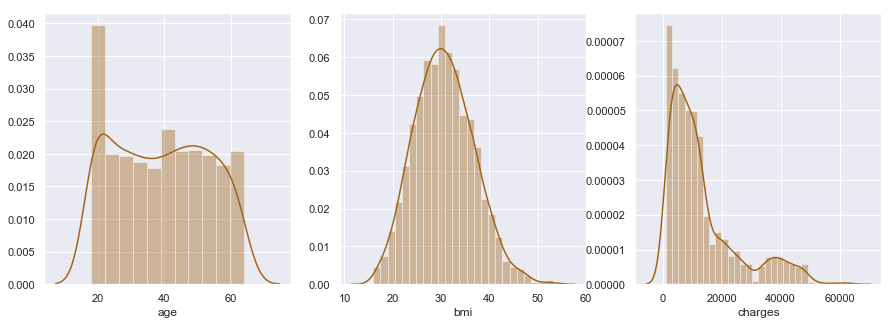

In [ ]:
f, axes = plt.subplots(1,3,figsize=(15, 5), sharex=False)
#age
sns.distplot(dataset['age'], ax=axes[0])

#bmi
sns.distplot(dataset['bmi'], ax=axes[1])

# charges
sns.distplot(dataset['charges'], ax=axes[2])


# Task 3f (Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns) below:

In [ ]:
dataset[['age', 'bmi', 'charges']].skew(axis = 0, skipna = True)

age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64

# Task 3g (Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns) below:

In [ ]:
def get_outlier(ds):
    # it takes a list as input and returns outliers 
    ds_std = np.std(ds)
    ds_mean = np.mean(ds)
    outlier_limit = 3*ds_std
    
    # Calculating lower limit and upper limit:
    lower_limit = ds_mean - outlier_limit
    upper_limit = ds_mean + outlier_limit
    
    #filtering out the outliers:
    outlier_list = []
    for i in ds:
        if(i < lower_limit or i > upper_limit):
            outlier_list.append(i)
            
    return outlier_list

print("BMI Outliers:",get_outlier(dataset['bmi']))
print("AGE Outliers:",get_outlier(dataset['age']))
print("CHARGES Outliers:",get_outlier(dataset['charges']))

BMI Outliers: [49.06, 50.38, 52.58, 53.13]
AGE Outliers: []
CHARGES Outliers: [51194.55914, 63770.42801, 58571.074479999996, 55135.402089999996, 52590.82939, 60021.39897, 62592.87309]


# Task 3h (Distribution of categorical columns (include children)) below:

Text(0.5, 1.0, 'Region wise Distribution')

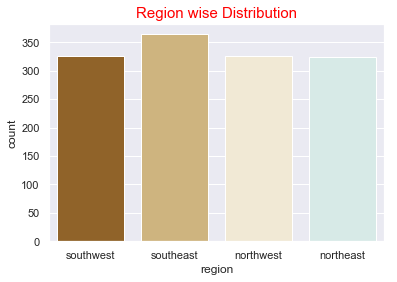

In [ ]:
# Region wise Distribution
sns.countplot( x = 'region', data = dataset)
plt.title('Region wise Distribution', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Sex/Gender wise Distribution')

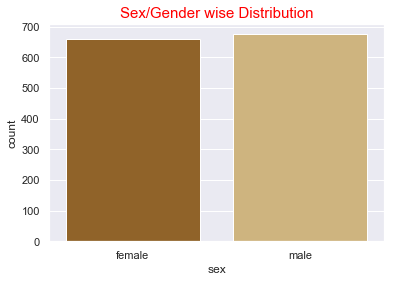

In [ ]:
# Sex/Gender wise Distribution:
sns.countplot(x = 'sex',  data = dataset)
plt.title('Sex/Gender wise Distribution', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Smoking Habits wise Distribution')

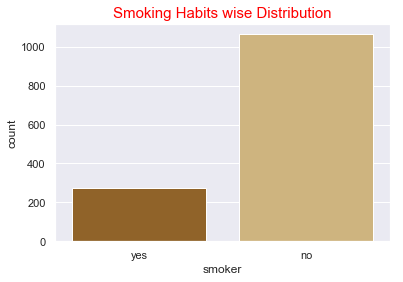

In [ ]:
# Smoking Habits wise Distribution:
sns.countplot(x = 'smoker',  data = dataset)
plt.title('Smoking Habits wise Distribution', fontsize = 15, color = 'red')

Text(0.5, 1.0, 'Children wise Distribution')

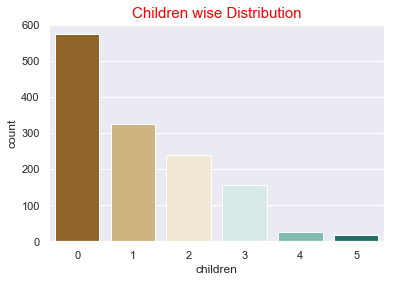

In [ ]:
# Children wise Distribution:
sns.countplot(x = 'children',  data = dataset)
plt.title('Children wise Distribution', fontsize = 15, color = 'red')

# Task 3i (Pair plot that includes all the columns of the dataframe)

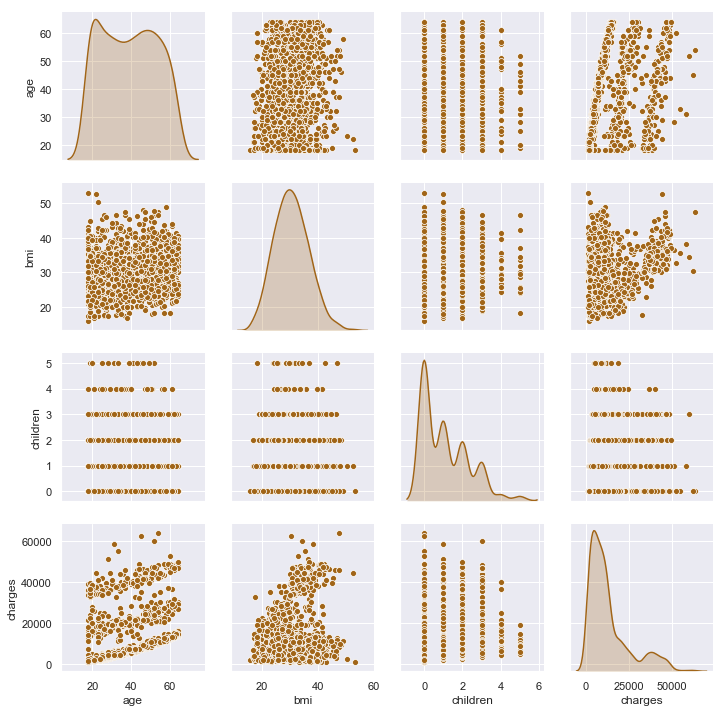

In [ ]:
sns.pairplot(dataset, diag_kind='kde')
plt.show()

# Task 4a Do charges of people who smoke differ significantly from the people who don't?

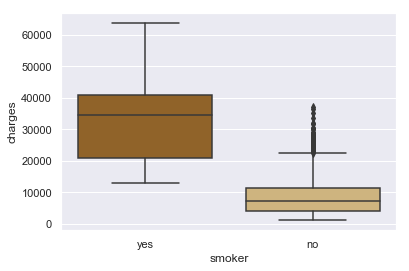

In [ ]:
sns.boxplot(x = "smoker", y = "charges", data = dataset)

From boxplot above we can see there is a significant difference between Charges Paid by smokers and Non Smokers.

Let's run significance test to find out if that is the case.

 Ho -> Insurance Charges of Smokers = Insurance Chanrges of non-smokers

 Ha -> Insurance Charges of Smokers > Insurance Chanrges of non-smokers
     or, Insurance Charges of Smokers < Insurance Chanrges of non-smokers

In [ ]:
# Comparision of charges paid by Smokers and Non Smokers:

smokers_df = dataset[dataset['smoker'] == 'yes']
smokers_charges = smokers_df['charges']

nonsmokers_df = dataset[dataset['smoker'] == 'no']
nonsmokers_charges = nonsmokers_df['charges']

print('The mean of Charges paid by Smokers and that of Non Smokers are {} and {} respectively'\
      .format(smokers_charges.mean(), nonsmokers_charges.mean()))

print('\nDifference of the mean of Charges paid by Smokers and the charges paid by Non Smokers is:'\
      ,smokers_charges.mean() - nonsmokers_charges.mean())

The mean of Charges paid by Smokers and that of Non Smokers are 32050.23183153285 and 8434.268297856199 respectively

Difference of the mean of Charges paid by Smokers and the charges paid by Non Smokers is: 23615.96353367665


From above, it is clear that on average, smoker pay more insurance chanrges than non-smikers.

Calculate p value usuing t-distribution.

In [ ]:
charges_t_statistic,charges_p_value = ttest_ind(smokers_charges,nonsmokers_charges)
print(charges_t_statistic, charges_p_value, "\n")

if(charges_p_value > 0.05):
    print("Accept 'Ho -> Insurance Charges of Smokers = Insurance Chanrges of non-smokers' with a p-value of {}".format(round(charges_p_value,4)))
else:
    print("Reject 'Ho -> Insurance Charges of Smokers = Insurance Chanrges of non-smokers' with a p-value of {}".format(round(charges_p_value,4)))

46.664921172723716 8.271435842177219e-283 

Reject 'Ho -> Insurance Charges of Smokers = Insurance Chanrges of non-smokers' with a p-value of 0.0


This implies that 'There is a significant difference in Charges paid by Smokers and Non Smokers'

# Task 4b Does bmi of males differ significantly from that of females?

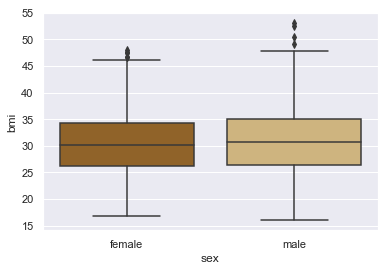

In [ ]:
sns.boxplot(x = "sex", y = "bmi", data = dataset)

From boxplot above we can see there is a slight difference between BMI of males and that of females.

Now let's run significance test if that is the case.

Ho -> BMI of Males = BMI of Females

Ha -> BMI of Males > BMI of Females
     or, BMI of Males < BMI of Females

In [ ]:
female_df = dataset[dataset['sex'] == 'female']
female_bmi = smokers_df['bmi']

male_df = dataset[dataset['sex'] == 'male']
male_bmi = male_df['bmi']

bmi_t_statistic,bmi_p_value = ttest_ind(female_bmi,male_bmi)
print(bmi_t_statistic, bmi_p_value, "\n")

if(bmi_p_value > 0.05):
    print("Not rejecting 'Ho -> BMI of Males = BMI of Females' with p-value of {}".format(round(bmi_p_value,4)))
else:
    print("Reject 'Ho -> BMI of Males = BMI of Females' with p-value of {}".format(round(bmi_p_value,4)))

-0.52919035604911 0.5967972927368852 

Not rejecting 'Ho -> BMI of Males = BMI of Females' with p-value of 0.5968


This implies that - there is not enough evidence to say that there is any difference between BMI of females and that of males.

# Task 4c. Is the proportion of smokers significantly different in different genders?

Here we need to find if proportions male smokers are significantly different than proportion of female smokers.

Let's run significance test to find it out.

Ho -> Proportion of male smokers = proportion of female smokers.

Ha -> Proportion of male smokers < proportion of female smokers
     or, Ho -> Proportion of male smokers > proportion of female smokers.

Since both Gender/Sex and Being Smoker are categorical variable, we will use z test.

In [ ]:
# Total number of Females
num_female = dataset.sex.value_counts()[1]

# Total number of Males
num_male = dataset.sex.value_counts()[0]

# Number of Female Smoker
female_smokers = dataset[dataset['sex'] == 'female'].smoker.value_counts()[1]

# Number of Male Smokers
male_smokers = dataset[dataset['sex'] == 'male'].smoker.value_counts()[1]

print('\nProportions of female smokers and male smokers are {} and {} respectively\n'\
      .format(round(female_smokers/num_female,2),round(male_smokers/num_male,2)))

zstat, p_value = proportions_ztest([female_smokers,male_smokers],[num_female,num_male])

if p_value > 0.05:
    print("Hence, 'Ho -> Proportion of male smokers = proportion of female smokers' with a p-value of {}"\
          .format(round(p_value,4)))
else:
    print("We reject 'Ho -> Proportion of male smokers = proportion of female smokers' with a p-value of {}\
    ,\ni.e. The Proportions of Smokers in Males and Females are not equal".format(round(p_value,4)))


Proportions of female smokers and male smokers are 0.17 and 0.24 respectively

We reject 'Ho -> Proportion of male smokers = proportion of female smokers' with a p-value of 0.0053    ,
i.e. The Proportions of Smokers in Males and Females are not equal


Above implies that - the proportion of smokers significantly different in different genders.

# 4d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [ ]:
# Dataframe with only females:
female_df = dataset[dataset['sex'] == 'female']

# females with no children:
female_0 = female_df[female_df['children'] == 0].loc[:,['children','bmi']]

# females with 1 child:
female_1 = female_df[female_df['children'] == 1].loc[:,['children','bmi']]

# females with 2 children:
female_2 = female_df[female_df['children'] == 2].loc[:,['children','bmi']]

female_bmi = pd.DataFrame()
female_bmi = female_bmi.append(female_0)
female_bmi = female_bmi.append(female_1)
female_bmi = female_bmi.append(female_2)

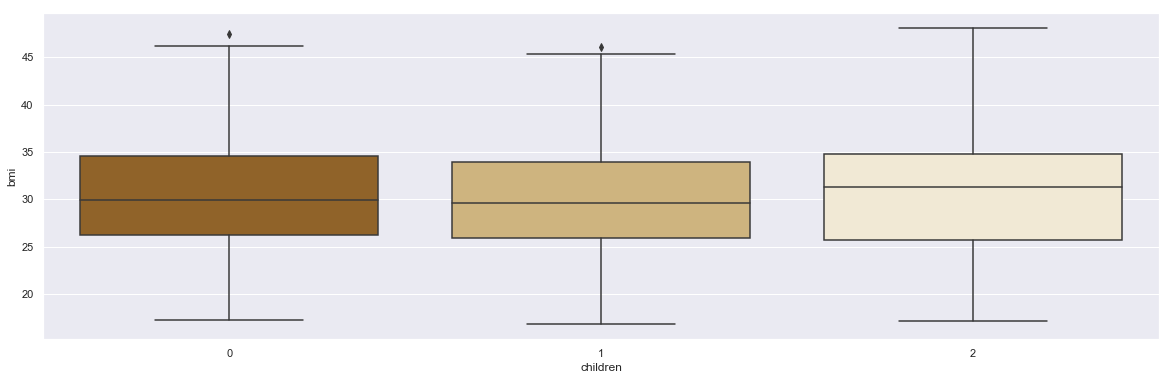

In [ ]:
plt.figure(figsize = (20,6))
g = sns.boxplot(x = 'children',  y = 'bmi', data = female_bmi)

Above Graphs imply there are differences between bmi of Females with no, one or two children.

We can run significance test using ANOVA.

Ho ->  mean1  =  mean2  =  mean3

Ha ->  At least one  of themeans  differs from another mean.

Now lets calculate p values using ANOVA

In [ ]:
mod = ols('bmi ~ C(children)', data = female_bmi).fit()
aov_table = sm.stats.anova_lm(mod, typ = 2)
print(aov_table)

                   sum_sq     df         F    PR(>F)
C(children)     24.590123    2.0  0.334472  0.715858
Residual     20695.661583  563.0       NaN       NaN


As p value here 0.715858 > 0.05, we can not reject the null hypothesis 'Ho ->  mean1  =  mean2  =  mean3'

 This implies that - there is not enough evidence to say that BMI across women with no children, one child and two children are different.